#### `Equality constrained` optimization

For twice-differentiable `convex` function $f: \mathbf{R}^n \rightarrow \mathbf{R}$, we want to

$$\min f(x), \text{s.t. } Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$ (`independent rows`), and $p^*$ is optimal value

We can write out the if and only if `optimality condition`

Start with Lagrangian

$$L(x, \nu)=f(x)+\nu^T(Ax-b)$$

With vanishing gradient of Lagrangian w.r.t. $x$, we have

$$\nabla_xL=\nabla f(x)+A^T\nu=0$$

and together with primal feasibility, we have the optimality condition

$$\boxed{x\in \text{dom }f, \, Ax=b, \nabla f(x)+A^T\nu = 0}$$

for Lagrange multipliers $\nu \in \mathbf{R}^p$

#### `Quadratic` example

$$\min \frac{1}{2}x^TPx+q^Tx+r, \text{s.t. } Ax=b$$

where $P\in S^n_+, \text{rank }A=p$

We can write the optimality condition

$$Ax=b,\, Px+q+A^T\nu=0$$

which is a set of $n+p$ linear equations in $n+p$ variables

$$\begin{bmatrix}P & A^T \\
A & 0\end{bmatrix}\begin{bmatrix}x \\ \nu\end{bmatrix}=\begin{bmatrix}-q \\ b\end{bmatrix}$$

where the coefficient matrix is the `KKT matrix`

The equivalent condition for `nonsingularity` of KKT matrix is

* $\text{rank}(\begin{bmatrix}P \\ A\end{bmatrix})=n$

a) Apparently, KKT full rank $\Longrightarrow$ first $n$ columns are independent

b) To show that first $n$ columns in KKT are independent $\Longrightarrow$ KKT invertible, we assume KKT is `not invertible`

Then, there exists $x, \nu$ that are `not both non-zero` such that

$$Px+A^T\nu=0, Ax=0$$

or (left multiply by $x^T$ in first equation, and transpose and right multiply $\nu$ in second equation)

$$x^TPx+x^TA^T\nu=0, x^TA^T\nu=0$$

Therefore, $x^TPx=0$

Since $P$ is PSD, the only way this happens is $Px=0$

To see this, as PSD matrices are diagonalizable, we can write

$$x^TPx=(Q^Tx)^T\Lambda (Q^Tx)=\sum_{i}\lambda_i(q_i^Tx)^2$$

Because all $\lambda_i\geq 0$, therefore, the only way $x^TPx=0$ is $q_i^Tx=0$ for all $i$ corresponding to $\lambda_i > 0$

Therefore

$$Px=Q\Lambda Q^Tx = \sum_{i}\left[\lambda_i(q_i^Tx)\right]q_i=0$$

So, we have

$$\begin{bmatrix}P\\A\end{bmatrix}x=0$$

Since $\begin{bmatrix}P\\A\end{bmatrix}$ has independent columns, the only way this happens is that $x=0$

With $Px=0$, we have must $A^T\nu=0$

Since $\text{rank }A=p$, then, all of its $p$ rows (or $p$ columns of $A^T$) are independent, therefore $\nu=0$  

As a result, we have $x=\nu=0$, which is a contradiction, thus, KKT is invertible

#### Equality constrained `Newton step`

Recall Newton step in unconstrained optimization is based on 2nd order Taylor approximation of the function at some $x$

$$\begin{align*}
\Delta x_{nt}&=\arg \min_v f(x+v) \\
&\approx \arg \min_v f(x)+\nabla f(x)^Tv+\frac{1}{2}v^T\nabla^2 f(x) v
\end{align*}$$

With equality constraint (assume $x\in \text{dom }f$ and $Ax=b$)

$$A(x+v)=b$$

we can write the `optimality conditions` ($x\in \text{dom }f, \, Ax=b, \nabla f(x)+A^T\nu = 0$) as (note, take derivative w.r.t. $v$, not $x$)

$$\boxed{A(x+v)=b ,\, \nabla f(x+v)+A^Tw \approx \nabla f(x) + \nabla^2f(x)v+A^Tw=0}$$

Using KKT matrix, and with $A(x+v)=b, Ax=b \Longrightarrow Av=0$, we can see that the solution of $v$ that is `Newton step` solves

$$\boxed{\begin{bmatrix}
\nabla^2 f(x) & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
v\\w
\end{bmatrix}=\begin{bmatrix}
-\nabla f(x)\\0
\end{bmatrix}}$$

Since solution $v$ is in the `nullspace` of $A$, we know that applying Newton step would always keep $x+\Delta x_{nt}$ `feasible`

#### Equality constrained `Newton decrement`

Similarly, we define Newton decrement as

$$\begin{align*}
\lambda(x)&= \left(\Delta x_{nt}^T \nabla^2 f(x) \Delta x_{nt}\right)^{1/2} \\
& = \left(-\nabla f(x)^T\Delta x_{nt}\right)^{1/2}
\end{align*}$$

which is still the `Newton step measured using quadratic norm under the Hessian`

The `second expression` of $\lambda(x)$ comes from the fact that Newton step satisfies KKT equations, so we have

$$\nabla^2 f(x)\Delta x_{nt}+A^Tw=-\nabla f(x)$$

Multiply $\Delta x_{nt}^T$ from the left on each side of first block equation

$$\Delta x_{nt}^T\nabla^2 f(x)\Delta x_{nt}+\Delta x_{nt}^TA^Tw=-\Delta x_{nt}^T\nabla f(x)$$

From second block equation we have the feasibility condition

$$A\Delta x_{nt}=0$$

Plug into the first block equation

$$\Delta x_{nt}^T\nabla^2 f(x)\Delta x_{nt}=-\Delta x_{nt}^T\nabla f(x)$$

Since right hand side is just a dot product, we have

$$\boxed{\Delta x_{nt}^T\nabla^2 f(x)\Delta x_{nt}=-\nabla f(x)^T \Delta x_{nt}}$$

`However`

$$\lambda(x)\neq\left(\nabla f(x)^T \left(\nabla^2f(x)\right)^{-1}\nabla f(x)\right)^{1/2}$$

since in general constrained case

$$\Delta x_{nt}\neq \left(\nabla^2f(x)\right)^{-1}\nabla f(x)$$

Similarly, we can relate Newton decrement to 2nd order approximation of $f$ at $x$ for equality-constrained case

$$\begin{align*}
f(x)-\inf_{u} \hat{f}(x+u) &= f(x)-\hat{f}(x+\Delta x_{nt}) \\
& = f(x) - \left(f(x)+\nabla f(x)^T\Delta x_{nt}+\frac{1}{2}\Delta x_{nt}^T\nabla^2f(x)\Delta x_{nt}\right) \\
& \Delta x_{nt}^T\nabla^2 f(x)\Delta x_{nt}=-\nabla f(x)^T \Delta x_{nt}\\
& = \Delta x_{nt}^T\nabla^2 f(x)\Delta x_{nt}-\frac{1}{2}\Delta x_{nt}^T\nabla^2f(x)\Delta x_{nt} \\
&=\frac{1}{2}\lambda(x)^2
\end{align*}$$

We see that $\frac{1}{2}\lambda(x)^2$ again provides an estimate of $f(x)-p^*$ `based on 2nd order approximation` of $f$ at $x$

#### `Newton's method` with equality constraints

We now have steps for equality-constrained Newton's method

Start with a `feasible point` $x\in \text{dom }f, Ax=b$
* compute Newton `step` $\Delta x_{nt}$ from KKT equation (i.e., solve for $v$) and Newton `decrement`
$$\lambda(x)=\left(\Delta x_{nt}^T \nabla^2 f(x) \Delta x_{nt}\right)^{1/2}$$
* stopping criterion
$$\frac{1}{2}\lambda(x)^2 \leq \epsilon$$
* line search for `step size`, starting at $t=1$, backtrack $t\leftarrow \beta t$ until
$$\begin{align*}f(x+t\Delta x_{nt})&<f(x)+\alpha t \nabla f(x)^T\Delta x_{nt} \\
& = f(x)-\alpha t \lambda(x)^2
\end{align*}$$
* update
$$x\leftarrow x+t\Delta x_{nt}$$

#### Newton step at `infeasible points`

If we are currently at an infeasible point, meaning $Ax\neq b$, then, we have $Av=-(Ax-b)$, and the KKT equation becomes

$$\begin{bmatrix}
\nabla^2 f(x) & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
v\\w
\end{bmatrix}=-\begin{bmatrix}
\nabla f(x)\\Ax-b
\end{bmatrix}$$

From the solution, we can see that if we take the `full` Newton step $\Delta x_{nt}$, $x+\Delta x_{nt}$ will be `feasible`, and the rest iterations will be taken care of based on the previous analysis on Netwon step at feasible points

##### Primal-dual interpretation

We can also more explicitly updates both primal and dual variables (previously, we didn't really touch the dual variable)

If we write out `residual` from the optimality condition, we have

$$r(x, \nu)=\begin{bmatrix}\nabla f(x)+A^T\nu \\ Ax-b \end{bmatrix}$$

`Linearize` and set it to zero (since we want residual to be zero), we have

$$r(x, \nu)+Dr(x, \nu)\begin{bmatrix} \Delta x_{nt} \\ \Delta \nu_{nt} \end{bmatrix}=0$$

For the Jacobian, we have

$$Dr(x, \nu)=\begin{bmatrix}\frac{\partial r_1}{\partial x} & \frac{\partial r_1}{\partial \nu}\\ \frac{\partial r_2}{\partial x} & \frac{\partial r_2}{\partial \nu} \end{bmatrix}=\begin{bmatrix}\nabla^2 f(x) & A^T\\ A & 0 \end{bmatrix}$$

Rearrange

$$\boxed{\begin{bmatrix}\nabla^2 f(x) & A^T\\ A & 0 \end{bmatrix}\begin{bmatrix} \Delta x_{nt} \\ \Delta \nu_{nt} \end{bmatrix}=-\begin{bmatrix}\nabla f(x)+A^T\nu \\ Ax-b \end{bmatrix}}$$

where $w=\nu + \Delta \nu_{nt}$

Easy to check that if we consider $r(x,\nu)$ as function of $x$ only, the above derivation gives

$$\begin{bmatrix}
\nabla^2 f(x) & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
\Delta x_{nt}\\ \nu
\end{bmatrix}=-\begin{bmatrix}
\nabla f(x)\\Ax-b
\end{bmatrix}$$

which is what we have previously

#### Newton's method with infeasible start

Start with a point $x\in \text{dom }f$ and $\nu$
* compute primal and dual Newton `step` $\Delta x_{nt}, \Delta \nu_{nt}$
* line search for `step size`, starting at $t=1$, backtrack $t\leftarrow \beta t$ until
$$\|r(x+t\Delta x_{nt}, \nu+t\Delta \nu_{nt})\|_2\leq (1-\alpha t)\|r(x, \nu)\|_2$$
* update
$$x\leftarrow x+t\Delta x_{nt}, \nu\leftarrow \nu+t\Delta \nu_{nt}$$
* terminate if $Ax=b$ and $\|r(x,\nu)\|_2\leq \epsilon$

The reason we cannot use function value for line search is that in order to get back to feasible set, function value may need to increase, so it is no longer a descent method

#### Analytical centering with infeasible start

$$\min f(x)=-\sum_{i=1}^n \log x_i , \,\, \text{s.t. } Ax=b$$

This optimization keeps $x$ as far away from each boundary as possible and the solution $x^*$ is known as the `analytic center` of the polyhedron

To initialize Newton's method for this problem, we are required to find a point that is feasible, which by itself can be a challenge. Alternatively, we can use `infeasible start Newton's method` with any initial $x^0$

However, one `disadvantage` of infeasible start Newton's method is that there is no clear way to detect that there exists `no` strictly feasible point

##### When the problem is feasible

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

In [2]:
def ldlt_factorization(A):
    # Assume A is symmetric
    m = A.shape[0]
    l_mat = A.copy().astype(float)
    d_mat = np.zeros(m)

    for k in range(m):
        d_mat[k] = l_mat[k, k]
        if l_mat[k, k] == 0:
            raise ValueError('Matrix is singular')

        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= l_mat[k, k]

    return np.tril(l_mat), np.diag(d_mat)

def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [3]:
np.random.seed(42)

n = 80
m = 50

A = np.random.randn(m, n)
x_0 = np.random.rand(n)
b = A @ x_0

def centering_infeasible_nt(A, b, n_iter=30, np_solver=False):
    alpha = 0.05
    beta = 0.3
    tol = 1e-12
    n_iter = n_iter

    rp_list = []
    rd_list = []
    r_list = []
    t_list = []

    # infeasible start
    x = np.ones(n)
    nu = np.ones(m)

    for k in range(n_iter):
        rp = A @ x - b
        rd = -1.0 / x + A.T @ nu
        rp_list.append(np.linalg.norm(rp))
        rd_list.append(np.linalg.norm(rd))
        norm_r = np.linalg.norm(np.hstack([rd, rp]))
        r_list.append(norm_r)
        if norm_r < tol:
            break

        hess_f_inv = np.diag(x**2)
        # Solve KKT equations use block elimination

        # A hess^-1 A^T dnu = rp - A hess^-1 rd
        if np_solver:
            dnu = np.linalg.solve(A @ hess_f_inv @ A.T, rp - A @ hess_f_inv @ rd)
        else:
            try:
                L = cholesky_factorization(A @ hess_f_inv @ A.T)
                dnu = forward_substitution(L, rp - A @ hess_f_inv @ rd)
                dnu = back_substitution(L.T, dnu)
            except Exception as e:
                print(e)
                break

        # hess dx = - (rd + A^T dnu)
        dx = - hess_f_inv @ (rd + A.T @ dnu)

        t = 1.0

        # Ensure feasibility
        while np.min(x + t * dx) <= 0:
            t *= beta
        # Line search on norm of residual
        while np.linalg.norm(
            np.hstack([-1.0 / (x + t * dx) + A.T @ (nu + t * dnu), A @ (x + t * dx) - b])
        ) > (1 - alpha * t) * norm_r:
            t *= beta

        t_list.append(t)
        x += t * dx
        nu += t * dnu

    return np.array(rp_list), np.array(rd_list), np.array(r_list), np.array(t_list)

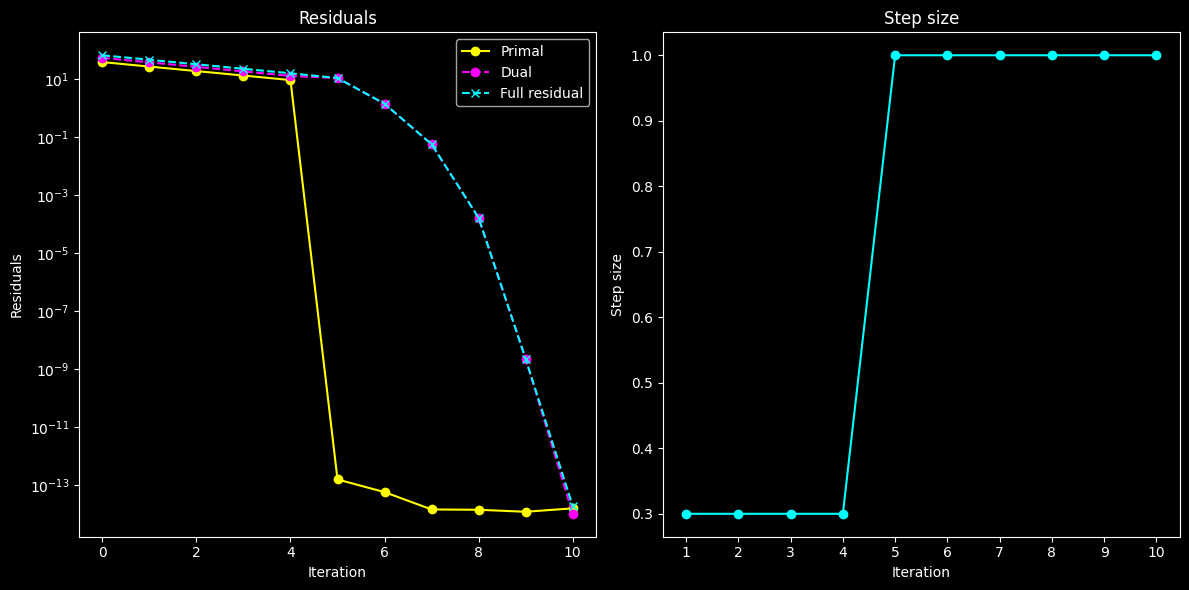

In [4]:
rp_list, rd_list, r_list, t_list = centering_infeasible_nt(A, b, np_solver=False)

fig_1, ax_1 = plt.subplots(1, 2, figsize=(12, 6))

ax_1[0].semilogy(rp_list, 'o-', label='Primal',c='yellow')
ax_1[0].semilogy(rd_list, 'o--', label='Dual', c='magenta')
ax_1[0].semilogy(r_list, 'x--', label='Full residual', c='cyan')
ax_1[0].set_xlabel('Iteration')
ax_1[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_1[0].set_ylabel('Residuals')
ax_1[0].legend()
ax_1[0].set_title('Residuals')

ax_1[1].plot(range(1, len(t_list)+1), t_list, 'o-', label='Step size', c='cyan')
ax_1[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_1[1].set_xlabel('Iteration')
ax_1[1].set_ylabel('Step size')
ax_1[1].set_title('Step size')

plt.tight_layout()
plt.show()

##### When the problem is `infeasible`

The idea is to use $x$ with `negative` entries to generate $b$

In this case, the residuals do not converge to zero

No full steps are taken, and the step sizes converge to zero

In [5]:
np.random.seed(42)

A_2 = np.random.randn(m, n)
x_0 = np.random.randn(n) # Normally distributed rather than uniformly
b_2 = A_2 @ x_0

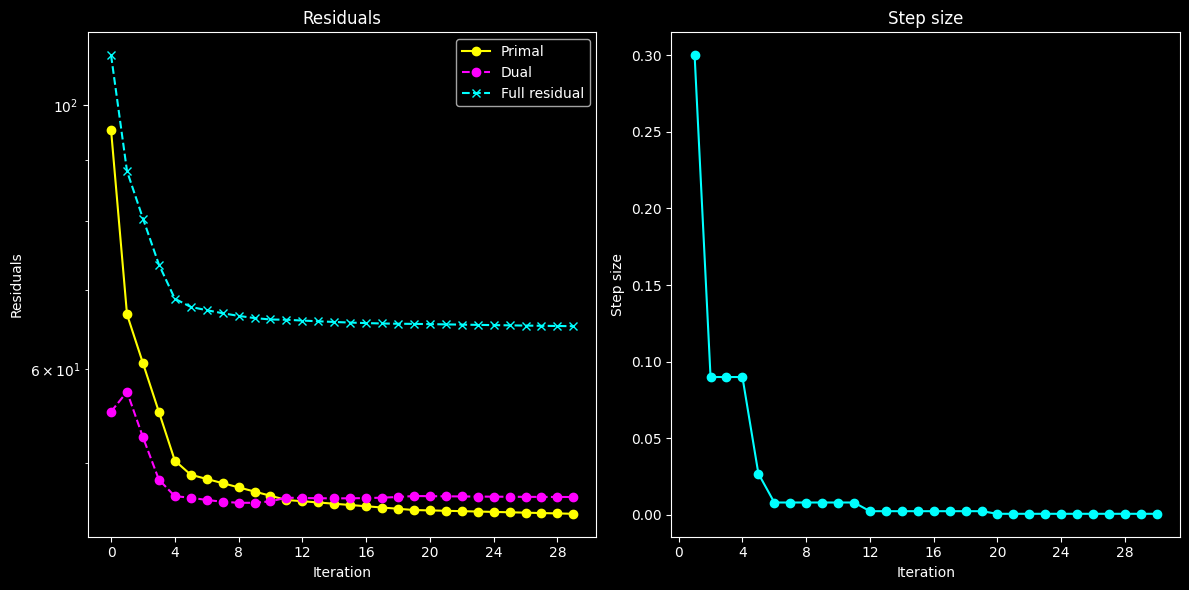

In [6]:
rp_list_2, rd_list_2, r_list_2, t_list_2 = centering_infeasible_nt(A_2, b_2, np_solver=False)

fig_2, ax_2 = plt.subplots(1, 2, figsize=(12, 6))

ax_2[0].semilogy(rp_list_2, 'o-', label='Primal',c='yellow')
ax_2[0].semilogy(rd_list_2, 'o--', label='Dual', c='magenta')
ax_2[0].semilogy(r_list_2, 'x--', label='Full residual', c='cyan')
ax_2[0].set_xlabel('Iteration')
ax_2[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_2[0].set_ylabel('Residuals')
ax_2[0].legend()
ax_2[0].set_title('Residuals')

ax_2[1].plot(range(1, len(t_list_2)+1), t_list_2, 'o-', label='Step size', c='cyan')
ax_2[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_2[1].set_xlabel('Iteration')
ax_2[1].set_ylabel('Step size')
ax_2[1].set_title('Step size')

plt.tight_layout()
plt.show()

#### Analytical centering with feasible start

To get a feasible start, we use feasible $x^0$ and perturb it with scaled version of a random vector $v$ in the nullspace of $A$

To do this, we can find another vector $v'$ such that $Av=Av'$

Using least norm solution, we have

$$v'=A^T(AA^T)^{-1}Av$$

Therefore, the vector $v\leftarrow v-v'$ is in the nullspace of $A$, since $A(v-v')=0$

We want to perturb $x^0$ using this $v$ and ensure that all entries after the perturbation is larger than $0$ to make it feasible

$$x^0+sv>0, s>0$$

Since $x^0>0$, the largest $s$ can go is $\frac{1}{\max(-v/x^0)}$, and we put a margin on top of it

In [7]:
np.random.seed(42)

# Make a feasible problem
A_3 = np.random.randn(m, n)
x_0 = np.random.rand(n)
b_3 = A_3 @ x_0

v = np.random.randn(n)
v = v - A_3.T @ np.linalg.lstsq(A_3 @ A_3.T, A_3 @ v, rcond=None)[0]
x_0 = x_0 + 0.9 / np.max(-v / x_0) * v

We use standard Newton's method (since we already saw infeasible start Newton's method)

In [8]:
def centering_nt(A, b, x_0, n_iter=30, np_solver=False):
    alpha = 0.05
    beta = 0.3
    tol = 1e-12
    n_iter = n_iter

    f_list = []
    t_list = []

    x=x_0

    for k in range(n_iter):
        g = -1.0 / x
        f = -np.sum(np.log(x))
        f_list.append(f)
        hess_f_inv = np.diag(x**2)

        # Solve KKT equations use block elimination

        # A hess^-1 A^T w = A hess^-1 g
        if np_solver:
            w = np.linalg.solve(A @ hess_f_inv @ A.T, - A @ hess_f_inv @ g)
        else:
            try:
                L = cholesky_factorization(A @ hess_f_inv @ A.T)
                w = forward_substitution(L, - A @ hess_f_inv @ g)
                w = back_substitution(L.T, w)
            except Exception as e:
                print(e)
                break

        # hess dx = - (g + A^T w)
        dx = - hess_f_inv @ (g + A.T @ w)

        # Newton decrement
        nt_decre_sq = - g @ dx
        if nt_decre_sq <= 0 or np.sqrt(nt_decre_sq) < tol:
            break

        t = 1.0

        # Ensure feasibility
        while np.min(x + t * dx) <= 0:
            t *= beta
        # Line search on f
        while -np.sum(np.log(x + t * dx)) > f + alpha * t * (g @ dx):
            t *= beta

        t_list.append(t)
        x += t * dx

    return np.array(f_list), np.array(t_list)

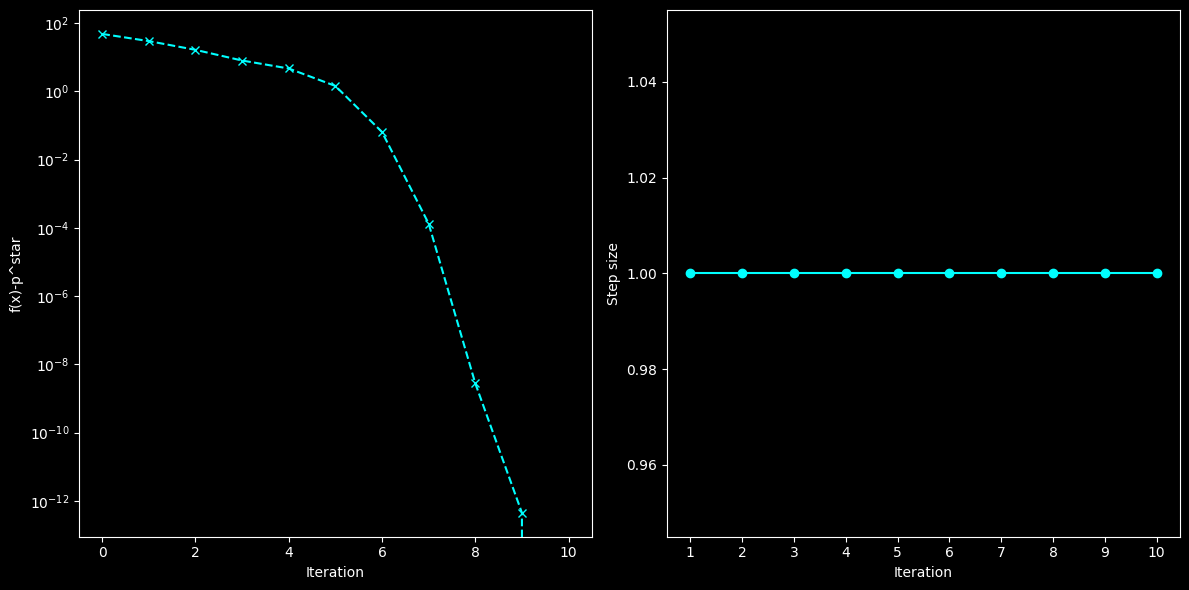

In [9]:
f_list_3, t_list_3 = centering_nt(A_3, b_3, x_0, np_solver=False)

fig_3, ax_3 = plt.subplots(1, 2, figsize=(12, 6))

ax_3[0].semilogy(f_list_3-f_list_3[-1], 'x--', label='f(x)-p^star', c='cyan')
ax_3[0].set_xlabel('Iteration')
ax_3[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_3[0].set_ylabel('f(x)-p^star')

ax_3[1].plot(range(1, len(t_list_3)+1), t_list_3, 'o-', label='Step size', c='cyan')
ax_3[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax_3[1].set_xlabel('Iteration')
ax_3[1].set_ylabel('Step size')

plt.tight_layout()
plt.show()